# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [5]:
df = pd.read_csv('../data/states_edu.csv')
df.head

<bound method NDFrame.head of              PRIMARY_KEY          STATE  YEAR  ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992     NaN      2678885.0   
1            1992_ALASKA         ALASKA  1992     NaN      1049591.0   
2           1992_ARIZONA        ARIZONA  1992     NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992     NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992     NaN     26260025.0   
...                  ...            ...   ...     ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019     NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019     NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019     NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019     NaN            NaN   
1714        2019_WYOMING        WYOMING  2019     NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0            304177.0      1659

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [8]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *GRADE 8 MATH*

How many years of data are logged in our dataset? 33

In [11]:
# @@@ 1
# Your Code

print(df["YEAR"].unique())
print(df["YEAR"].nunique())

[1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 1986 1987 1988
 1989 1990 1991 2017 2019]
33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose? *OHIO*

In [34]:
# @@@ 2

State = df.groupby("STATE")

# State["AVG_MATH_8_SCORE"].mean()

print(State["AVG_MATH_8_SCORE"].mean().loc["MICHIGAN"])     
print(State["AVG_MATH_8_SCORE"].mean().loc["OHIO"])

276.1666666666667
282.25


Find the average for your chosen test across all states in 2019

In [31]:
# @@@ 3

Year = df.groupby("YEAR")

# Year["AVG_MATH_8_SCORE"].mean()

print(Year["AVG_MATH_8_SCORE"].mean().loc[2019])


281.2641509433962


For each state, find a maximum value for your chosen test score

In [47]:
# @@@ 4

print(State["AVG_MATH_8_SCORE"].max())

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [79]:
# @@@ 5

df['Instruction_Expenditure_Over_State_Revenue'] = df['INSTRUCTION_EXPENDITURE'] / df['STATE_REVENUE'].replace(0, pd.NA)
df['Instruction_Expenditure_Over_Local_Revenue'] = df['INSTRUCTION_EXPENDITURE'] / df['LOCAL_REVENUE'].replace(0, pd.NA)

df = df.replace([float('inf'), -float('inf')], pd.NA)  # Replace infinity with NaN
df = df.dropna(subset=['Instruction_Expenditure_Over_State_Revenue', 'Instruction_Expenditure_Over_Local_Revenue'])

Feature engineering justification: **<I know teacher salary varies across districts. I wanted to see if states that spend a greater proportion of their revenue paying teachers have kids with higher test scores.\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

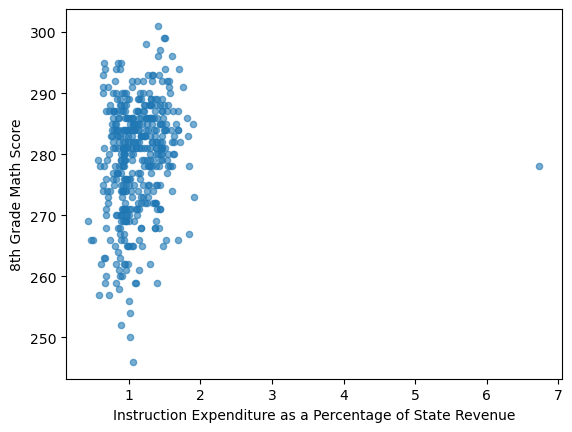

In [62]:
# @@@ 6

df.plot.scatter(x='Instruction_Expenditure_Over_State_Revenue', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure as a Percentage of State Revenue')
plt.ylabel('8th Grade Math Score')

**<Almost all states spend 2% or less of their revenue on instruction expenditure. Unfortunately, there seems to be no correlation between Grade 8 Math Scores and the percent of a state's revenue spent on instructors.>**

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

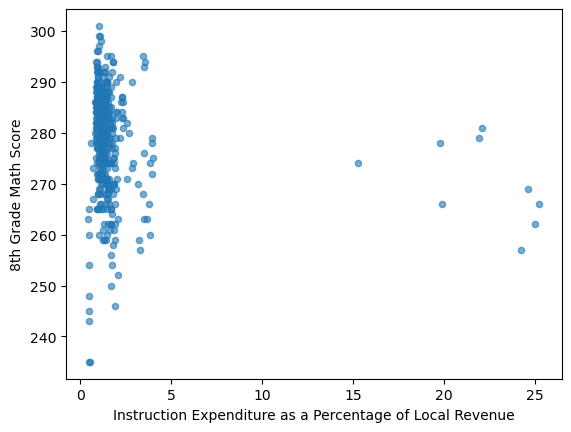

In [63]:
# @@@ 7

df.plot.scatter(x='Instruction_Expenditure_Over_Local_Revenue', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure as a Percentage of Local Revenue')
plt.ylabel('8th Grade Math Score')

**<Almost all states spend 1-5% of their revenue on instruction expenditure, although there are some outliers. Unfortunately, there seems to be no correlation between Grade 8 Math Scores and the percent of a state's local revenue spent on instructors.>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# @@@ 8

X = df[['Instruction_Expenditure_Over_State_Revenue','AVG_MATH_8_SCORE','Instruction_Expenditure_Over_Local_Revenue']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

# X =
# y = 

In [66]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [69]:
# @@@ 10
# import your sklearn class here

from sklearn.linear_model import LinearRegression

In [70]:
# @@@ 11
# create your model here
# model = 
model = LinearRegression()

In [ ]:
# df['Instruction_Expenditure_Over_State_Revenue'] = df['Instruction_Expenditure_Over_State_Revenue'].replace('inf', pd.NA)
# df['Instruction_Expenditure_Over_Local_Revenue'] = df['Instruction_Expenditure_Over_Local_Revenue'].replace('inf', pd.NA)

model.fit(X_train, y_train)

# I have tried for the last 45 minutes to get this to work using ChatGPT and Stack Overflow. There is an hour 
# before the deadline to submit and I don't think I'm going to have any luck anytime soon. I can't get this to
# work and therefore none of the steps afterwards will work. If I could get this to work I think I would be able
# to do the rest.

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
y_pred = model.predict(X_test)

# Unable to finish due to difficulty above on step 11

ValueError: Input X contains infinity or a value too large for dtype('float64').

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [86]:
# @@@ 12

# ****Unable to finish due to difficulty above on step 11


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [ ]:
# @@@ 13

# col_name = 'COLUMN NAME OF ONE PREDICTOR'


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_train[col_name], y_train, color = "red")
# plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

# plt.legend(['True Training','Predicted Training'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior On Training Set")



# ****Unable to finish due to difficulty above on step 11

In [ ]:
# @@@ 14


# col_name = 'COLUMN NAME OF ONE PREDICTOR"


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")


# ****Unable to finish due to difficulty above on step 11